In [2]:
#Importeren libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Data preperation dataframe 1 about the wealth
data = 'naamloze map/Wealth_households__components_of_wealth_19102023_113649.csv'
wealth = pd.read_csv(data, sep = ';')
wealth.iloc[15,2] = '2021'
wealth['Mean wealth (1 000 euros)'] = wealth['Mean wealth (1 000 euros)'].str.replace(',', '.').astype(float)
wealth

FileNotFoundError: [Errno 2] No such file or directory: 'naamloze map/Wealth_households__components_of_wealth_19102023_113649.csv'

In [4]:
#Data preperation dataframe 2 about the flights
df = 'Monthly_figures_on_aviation_18102023_114153.csv'
flight = pd.read_csv(df, sep =';')
flight.rename(columns={'Commercial air traffic/Flights/All flights/Total flights (number)': 'Total flights'}, inplace=True)
flight.rename(columns={'Commercial air traffic/Passengers/Total passengers/Total passengers (number)': 'Total passengers'}, inplace=True)
flight['Amsterdam Schiphol Airport flights'] = [423122, 435972, 428332, 391265, 386316, 420245, 423405, 425565, 438295, 450673, 478864, 496739, 499444, 496827, 227275, 266956]
flight['Eindhoven Airport flights'] = [11398, 12390, 14491, 13432, 16244, 19680, 22450, 24593, 27023, 28835, 30910, 34929, 37035, 40209, 17875, 20524]
flight['Rotterdam Airport flights'] = [18276, 18555, 17447, 15397, 14643, 14948, 15245, 18659, 18790, 19022, 19055, 16270, 17615, 18406, 6337, 8307]
flight

,Airports,Periods,Total flights,Total passengers,Commercial air traffic/Cargo/Total cargo/Total cargo (ton),Commercial air traffic/Mail/Total mail/Total mail (ton),Amsterdam Schiphol Airport flights,Eindhoven Airport flights,Rotterdam Airport flights
0,Total Dutch airports,2006,467332,48596556,1581305,40321,423122,11398,18276
1,Total Dutch airports,2007,479506,50517673,1668673,41103,435972,12390,18555
2,Total Dutch airports,2008,473563,50425690,1623778,34873,428332,14491,17447
3,Total Dutch airports,2009,429129,46455743,1340756,30749,391265,13432,15397
4,Total Dutch airports,2010,427392,48591528,1574598,25878,386316,16244,14643
5,Total Dutch airports,2011,462330,53868142,1589253,25880,420245,19680,14948
6,Total Dutch airports,2012,468581,55653320,1536055,28375,423405,22450,15245
7,Total Dutch airports,2013,476792,58047513,1585170,34872,425565,24593,18659
8,Total Dutch airports,2014,491024,60932617,1689976,37481,438295,27023,18790
9,Total Dutch airports,2015,504967,64634615,1677452,34385,450673,28835,19022


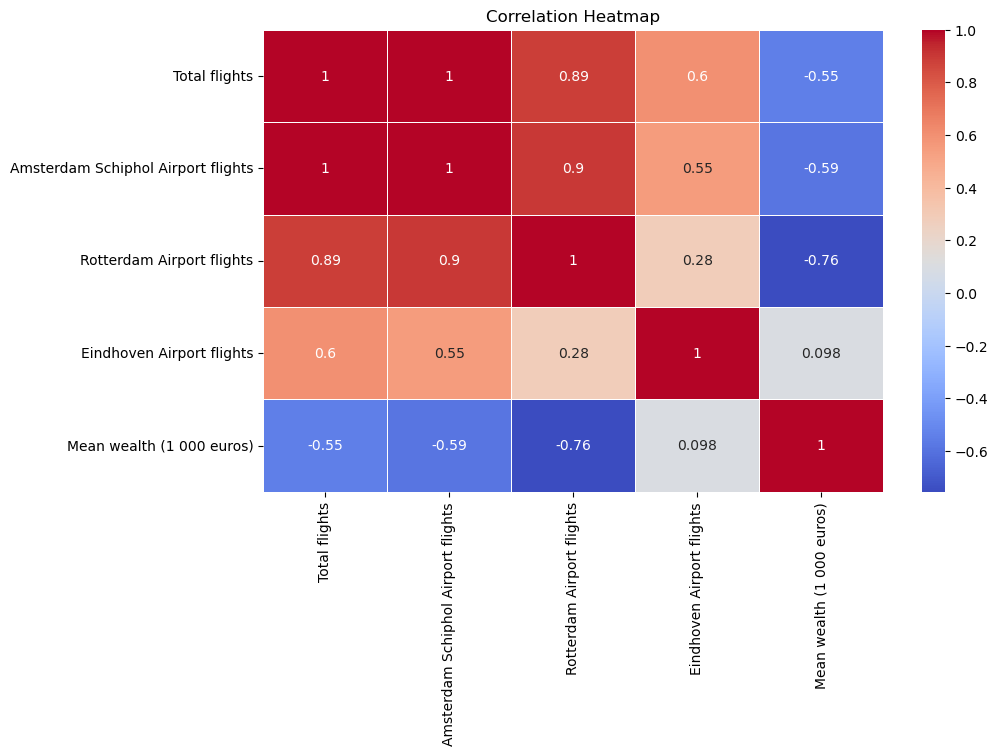

In [5]:
#Visualisation of the correlation between the wealth and the number of flights from the 3 main airports and the total flights
columns = ['Total flights', 'Amsterdam Schiphol Airport flights', 'Rotterdam Airport flights', 'Eindhoven Airport flights', 'Mean wealth (1 000 euros)' ]
# Combine the 'new' DataFrame and 'wealth' DataFrame based on the same index (Year)
combined_data = pd.concat([flight, wealth], axis=1)

# Calculate the correlation matrix for the selected columns
correlation_data = combined_data[columns]

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The results are a bit strange, because the correlation between mean wealth and total flights, amsterdam and rotterdam are negative. But a negative correlation means that if the one variabele decreases the other variable increases. So, in this case if the wealth increases the number of flights decreases. Despite, the correlation moderate correlation between total flight and mean wealth and between amsterdam and mean wealt. The correlation between rotterdam and wealth is very strong. Because of this the relation between rotterdam and wealth will further be explored. 

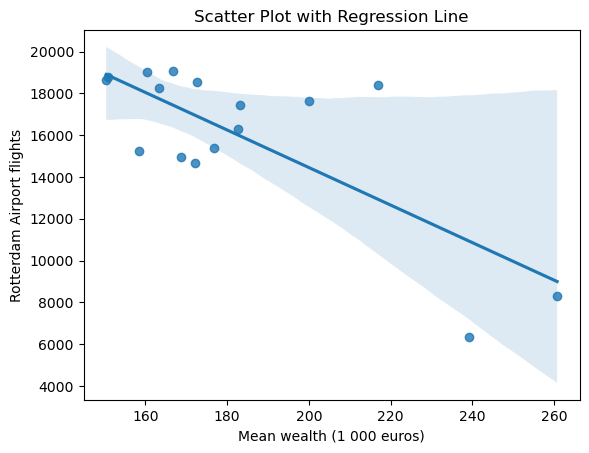

In [28]:
#Data plot in a regression model
sns.regplot(data=correlation_data, x="Mean wealth (1 000 euros)", y="Rotterdam Airport flights", robust = True)
#Set a title
plt.gca().set_title("Scatter Plot with Regression Line")
plt.show()

In the regression plot above is visible that the correlation between the flights from rotterdam airport and the wealth is a negative correlation. So, when the wealth increase (the people have more money to spend) the number of flights to Rotterdam airport decreases. By separately looking at the relationship between the number of flight movements from Rotterdam over time and the relationship between wealth and wealth over time, an underlying reason can be found for the behavior of this relationship.

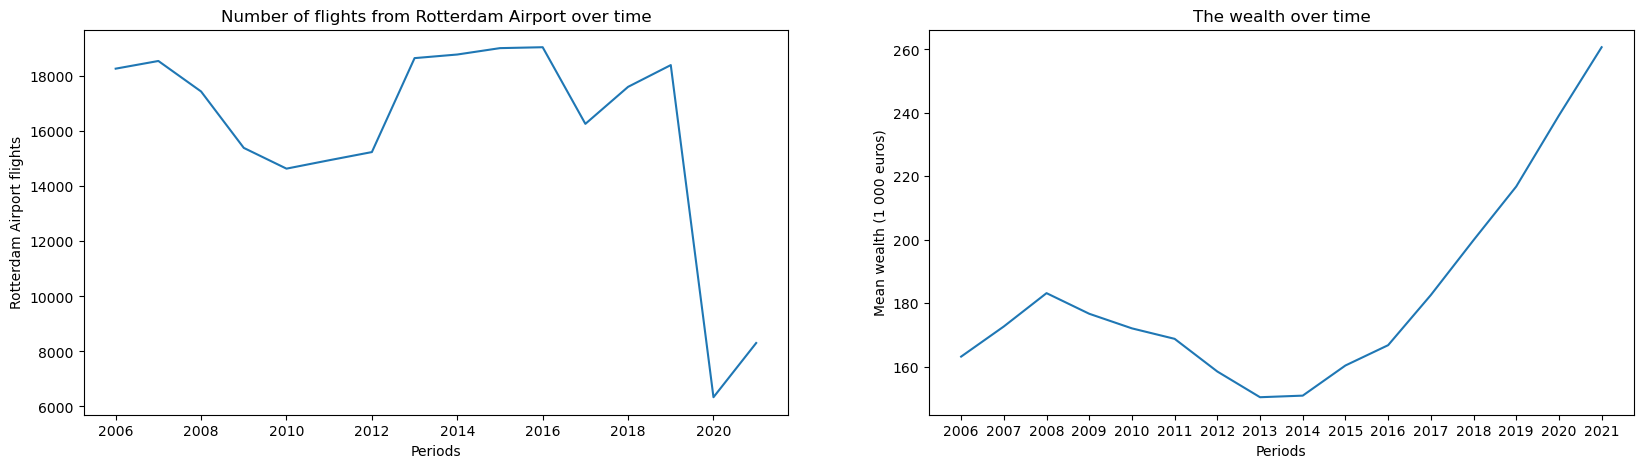

In [29]:
#Plot 2 lineplots next to each other
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
sns.lineplot(x='Periods', y='Rotterdam Airport flights', data=flight, ax=ax[0])
sns.lineplot(x='Periods', y='Mean wealth (1 000 euros)', data=wealth, ax=ax[1])

ax[0].set_title('Number of flights from Rotterdam Airport over time')
ax[1].set_title('The wealth over time')
plt.show()

In [4]:
#Plot the two graphs above in the same graph
y1_color = "red"
y2_color = "green"

x1 = flight['Periods']
y1 = flight['Rotterdam Airport flights']
y2 = wealth['Mean wealth (1 000 euros)']
y2_limit = y2.max() 

fig, ax1 = plt.subplots(figsize=(20, 8))
ax1.set_title("Relation")
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax2.set(ylim=(0, y2_limit))
g1 = sns.lineplot(data = flight, x = x1, y = y1, ax = ax1, color = y1_color) 
g3 = sns.lineplot(data = wealth, x = x1, y = y2, ax = ax3, color = y2_color)

NameError: name 'flight' is not defined

The above graphs represent the relationships between the number of flights from Rotterdam and the wealth indicators seperately over time. In the first graph, they are presented side by side, but then together in a single graph. This presentation makes it easier to compare the line plots, revealing that a decline in wealth is observable earlier in the number of flights than in the wealth trend itself. For instance, it is evident that wealth decreases from around 2008 to 2013, but a decrease in the number of flights begins as early as 2007. The same pattern holds for the COVID-19 crisis in 2019; there was a reduction in flight activity, but this crisis is not yet apparent in the wealth trend.

A couple of side notes: 
* I doubt the correlation matrix, because I thaught if the wealth decreases the number of flights also needs to decreases
* The last graph has a weirs right hand-side, but know idea how to fix that
* Maybe switch to another economic factor, because i can't explain to behaviour